In [53]:
print("Welcome,LogisticRegression")


Welcome,LogisticRegression


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv(r'C:/Users/HP/.jupyter/Machine Learning/loan_approval_dataset.csv')

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [7]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [8]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

<Axes: xlabel=' loan_status', ylabel='count'>

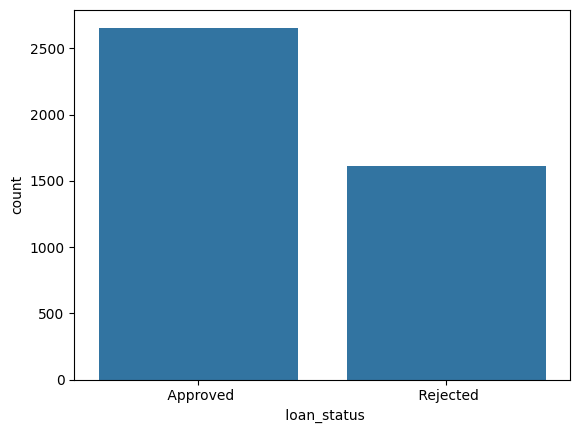

In [9]:
sns.countplot(data=df,x=' loan_status')

<Axes: xlabel=' education', ylabel='count'>

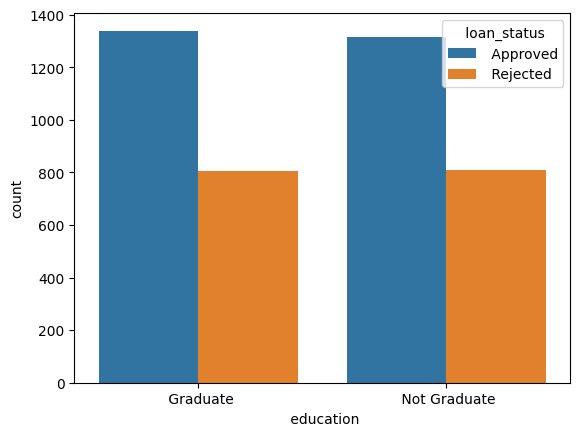

In [10]:
sns.countplot(df,x=' education',hue=' loan_status')

<Axes: xlabel=' self_employed', ylabel='count'>

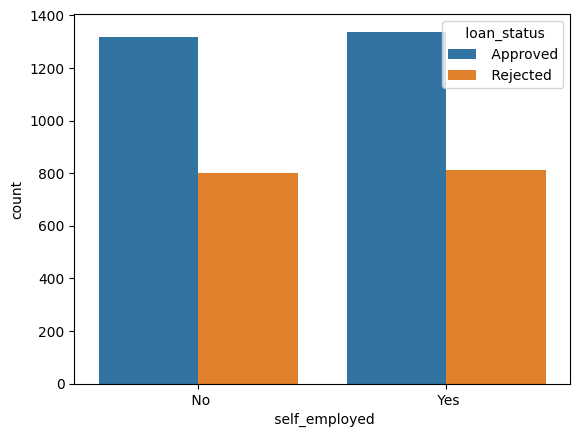

In [11]:
sns.countplot(df,x=' self_employed',hue=' loan_status')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

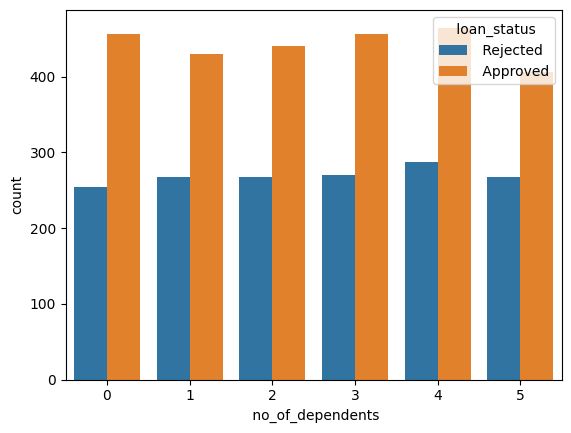

In [12]:
sns.countplot(df,x=' no_of_dependents',hue=' loan_status')

<Axes: xlabel=' loan_amount', ylabel='count'>

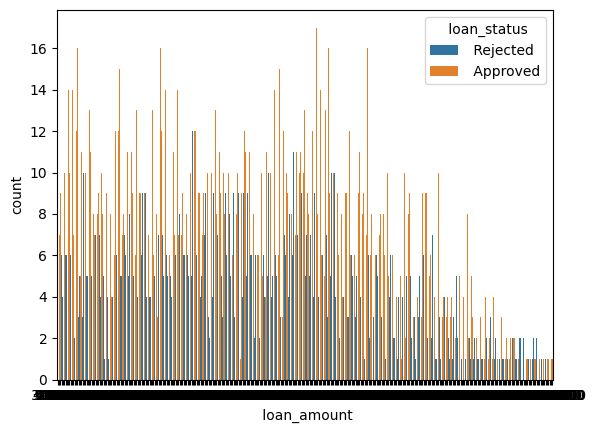

In [13]:
sns.countplot(df,x=' loan_amount',hue=' loan_status')

In [14]:
#Converting categorical form i
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [15]:
df['education']=df[' education'].map({' Graduate':1,' Not Graduate':0})

In [16]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [17]:
df['self_employed']=df[' self_employed'].map({' Yes':1,' No':0})

In [18]:
df['loan_status']=df[' loan_status'].map({' Approved':1,' Rejected':0})

In [19]:
df.drop(columns=[' loan_status'],axis=1,inplace=True)

In [20]:
df.drop(columns=[' education'],axis=1,inplace=True)

In [21]:
df.drop(columns=[' self_employed'],axis=1,inplace=True)

In [22]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [23]:
df.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.015536,0.001745,0.017685
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.002697,0.000765,-0.018114
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.011625,0.002368,-0.015189
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.010631,0.001450,0.016150
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.008417,0.004107,-0.113036
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,-0.004866,0.770518
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,0.006144,-0.014367
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,-0.017998,0.008246
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,0.004413,-0.015465
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.000215,-0.006778


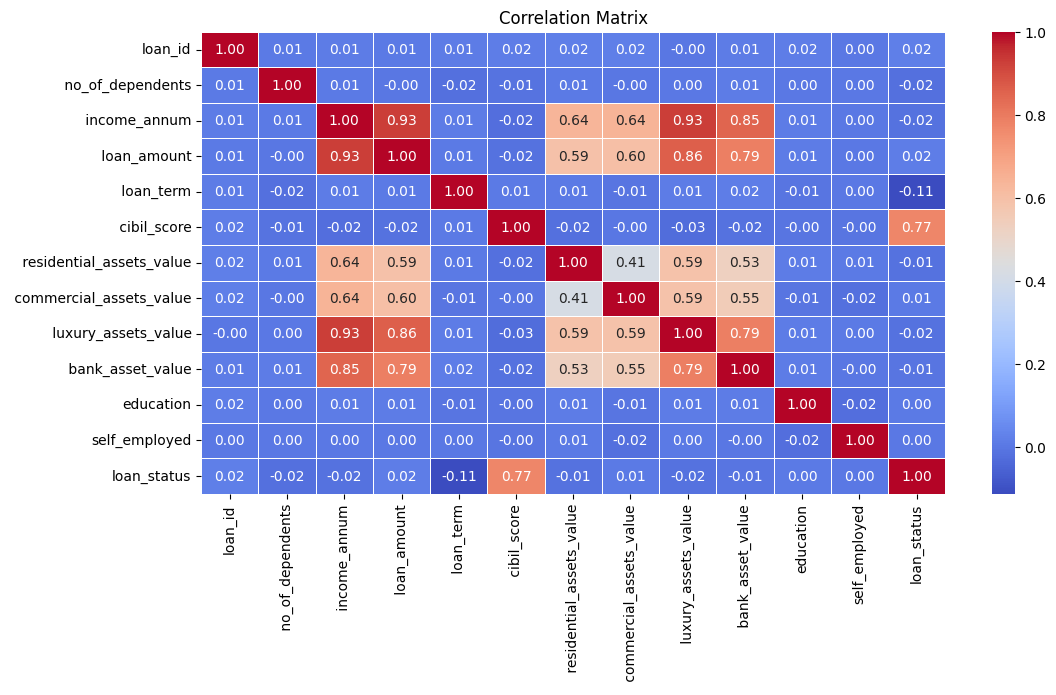

In [37]:
#Mapping and drawing
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [41]:
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Model Building

In [42]:
model=LogisticRegression()

In [45]:
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
y_pred = model.predict(X_test_scaled)

In [48]:
ac_score = accuracy_score(y_test,y_pred)

In [49]:
print(ac_score)

0.9074941451990632


In [51]:
report=classification_report(y_test,y_pred)

In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

